<a href="https://colab.research.google.com/github/kalyankargouri/computer-vision/blob/main/CameralCalibrationAndGeometricTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


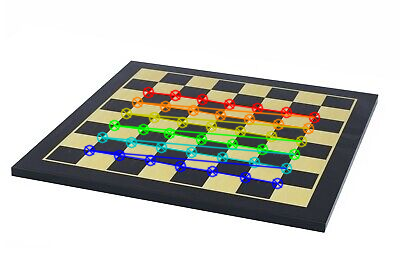

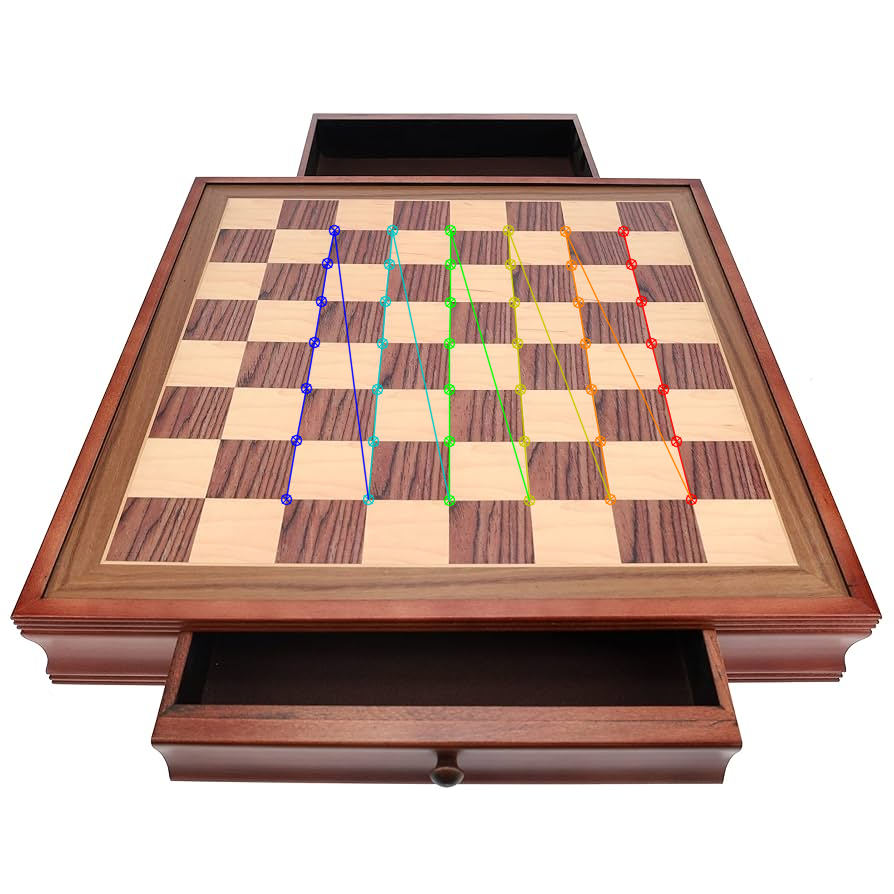

Camera matrix:
 [[2.81904212e+04 0.00000000e+00 4.60871645e+02]
 [0.00000000e+00 3.08365273e+03 4.77174057e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[-1.12213009e+00  6.02007040e+01  8.12036086e-01  3.05108700e-02
  -3.25110129e+02]]


In [2]:

import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/imagesclg/*.jpg') #Uses glob to load all .jpg files from the specified directory

gray = None # Initialize gray outside the loop

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Define gray here

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #looks for the 7×6 inner corners on the checkerboard.

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (7,6), corners, ret)
        cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
        # cv2.waitKey(100) # waitKey is not needed with cv2_imshow

# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

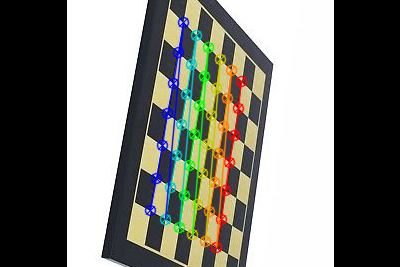

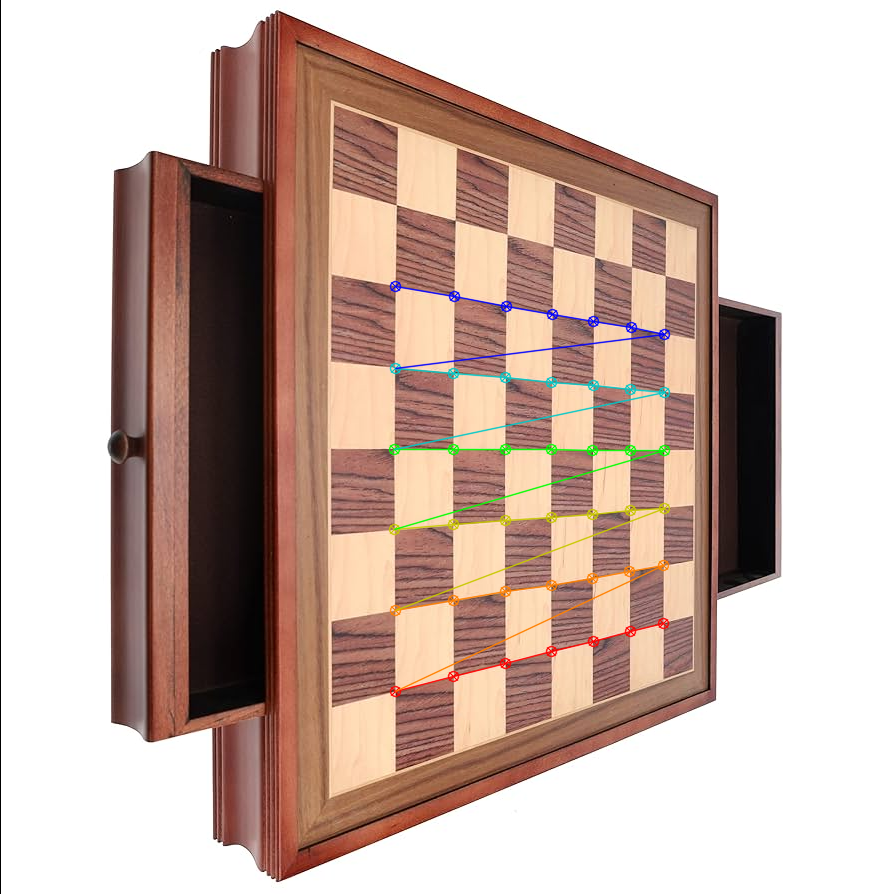

In [3]:
for fname in images:
    img = cv2.imread(fname)

    # Get image dimensions
    (h, w) = img.shape[:2]

    # Calculate center of the image
    center = (w // 2, h // 2)

    # Rotate the image by 90 degrees clockwise
    angle = -90  # negative for clockwise rotation
    scale = 1.0  # keep original scale

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Perform the rotation
    rotated_img = cv2.warpAffine(img, M, (w, h))

    gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(rotated_img, (7,6), corners, ret)
        cv2_imshow(rotated_img)

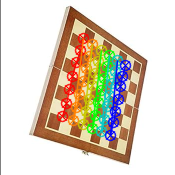

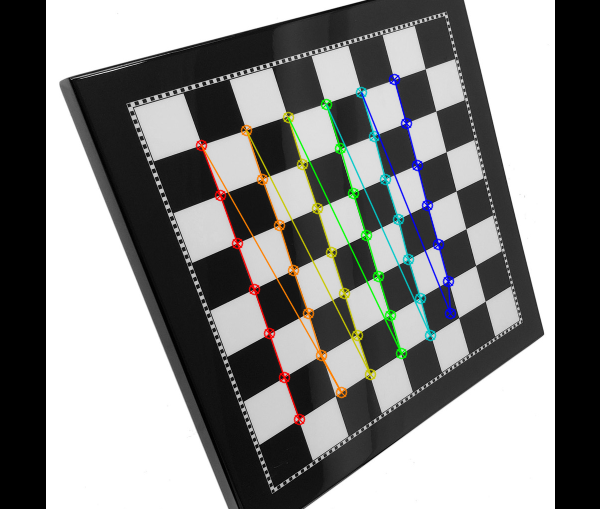

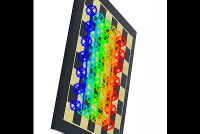

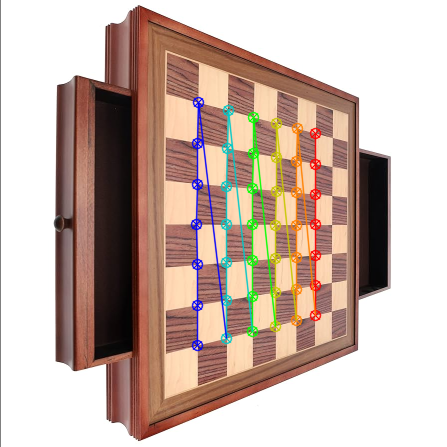

In [4]:
import cv2
import glob
import numpy as np

# Prepare object points (e.g., (0,0,0), (1,0,0), ..., (6,5,0) for a 7x6 chessboard)
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

objpoints = []  # 3D points in real world
imgpoints = []  # 2D points in image plane

# Get all image filenames
images = glob.glob('/content/drive/MyDrive/imagesclg/*.jpg')  # <-- Update this path

for fname in images:
    img = cv2.imread(fname)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)

    # Rotate 90 degrees clockwise
    angle = -90
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))

    # Scale the image
    scale_factor = 0.5
    scaled_img = cv2.resize(rotated_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

    # Convert to grayscale
    gray = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(scaled_img, (7, 6), corners, ret)

        # For notebooks (e.g., Google Colab)
        from google.colab.patches import cv2_imshow
        cv2_imshow(scaled_img)

        # For local Python use instead of cv2_imshow:
        # cv2.imshow('Chessboard', scaled_img)
        # cv2.waitKey(500)

# If using cv2.imshow(), remember to add:
# cv2.destroyAllWindows()


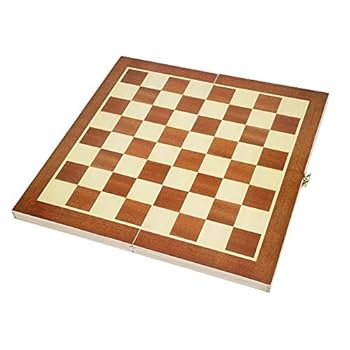

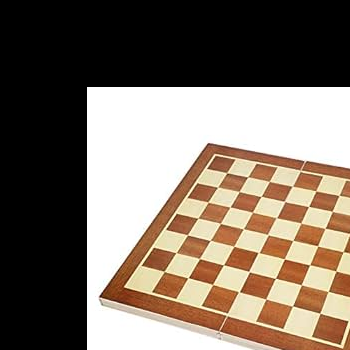

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/imagesclg/chess3.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image not found or cannot be loaded from {image_path}")
else:
    height, width = image.shape[:2]
    tx, ty = width // 4, height // 4
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, T, (width, height))
    cv2_imshow(image)
    cv2_imshow(translated_image)